In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [80]:
def Hcomplex(z):# computes the hue corresponding to the complex number z
    H = np.angle(z) / (2*np.pi) + 1
    return np.mod(H, 1)


In [11]:
def G(r,r_prime,phi, omega_0):
    dot =  np.einsum("ijk,i->jk",r, r_prime)
    if np.abs(np.exp(phi) - 1) < 1e-8:
        return 0.0
        # return np.exp((-np.square(np.linalg.norm(r)) - np.square(np.linalg.norm(r_prime, axis=0)) + 2*dot)/(omega_0*0.01))
    elif np.abs(np.exp(phi) + 1) < 1e-8:
        return 0.0
        # return np.exp((-np.square(np.linalg.norm(r)) - np.square(np.linalg.norm(r_prime, axis=0)) - 2*dot)/(omega_0*0.01))
    else:
        print(f"{phi=}")
        return np.exp(phi)/(2*np.pi*np.sinh(phi)) * np.exp(-(np.square(np.linalg.norm(r, axis=0)) + np.square(np.linalg.norm(r_prime, axis=0)))/(omega_0**2*np.tanh(phi)) + 2*dot/(omega_0**2*np.sinh(phi)))

def G_eta(r,r_prime,phi, omega_0, N, eta):
    sumOfG = np.zeros((r.shape[1],r.shape[2]), dtype=np.complex128)
    for s in range(N):
        sumOfG += np.exp(-2j*np.pi*s*eta/N)*G(r, r_prime, phi-2j*np.pi*s/N, omega_0)
    return sumOfG/N

def G_script(r, r_prime, omega_0, epsilon, kappa):
    return 0.0

phi=1.0471975511965976j


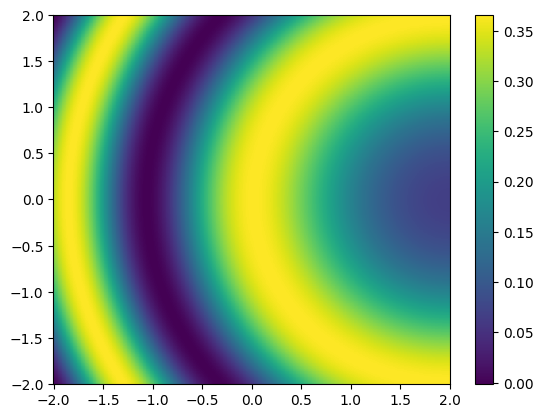

In [243]:
x = np.linspace(-2.0, 2.0, 500)
y = np.linspace(-2.0, 2.0, 500)
X,Y = np.meshgrid(x,y)
R = np.array([X,Y])

E = G(R, [1.0, 0.0], 1j*np.pi/3, 1.0)

plt.pcolor(X, Y, np.real(E - E[0,0]))
plt.colorbar()

phi=-1.7951958020513104j
phi=-2.6927937030769655j
phi=-3.5903916041026207j
phi=-4.487989505128276j
phi=-5.385587406153931j
phi=-7.180783208205241j
phi=1.7951958020513104j
phi=0.8975979010256552j
phi=-0.8975979010256552j
phi=-1.7951958020513104j
phi=-2.6927937030769655j
phi=-3.5903916041026207j


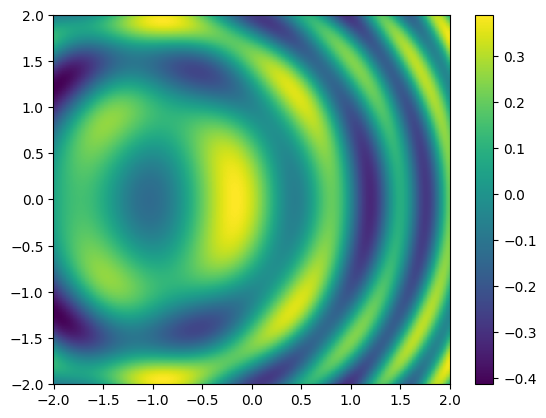

In [248]:
x = np.linspace(-2.0, 2.0, 500)
y = np.linspace(-2.0, 2.0, 500)
X,Y = np.meshgrid(x,y)
R = np.array([X,Y])

M = 4
N = 7
eta = 0

E = G_eta(R, [1.0, 0.0], -1j*M*np.pi/N, 1.0, N, eta) + G_eta(R, [1.0, 0.0], 1j*M*np.pi/N, 1.0, N, eta)
# E = G(R, [1.0,0.0], -1j*np.pi/2, 1.0)

plt.pcolor(X, Y, np.real(E))
plt.colorbar()
plt.show()

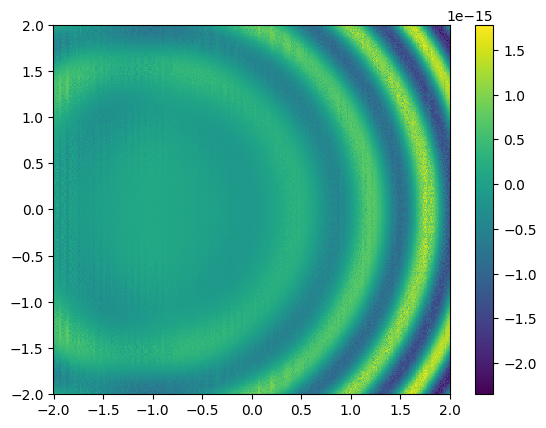

In [249]:
plt.pcolor(X, Y, np.imag(E))
plt.colorbar()

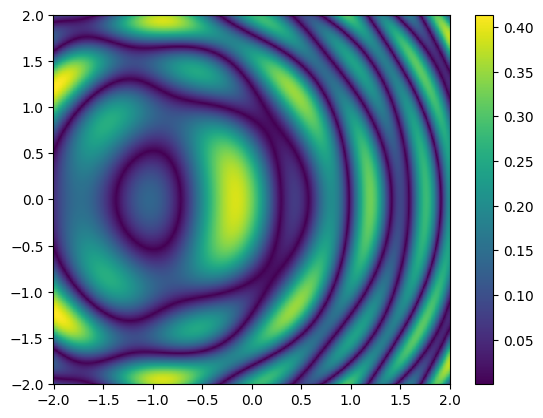

In [250]:
plt.pcolor(X, Y, np.abs(E))
plt.colorbar()

In [15]:
def findJijForPoints(listOfPoints, omega_0, M, N, eta):
    num_points = listOfPoints.shape[1]
    J = np.zeros((num_points,num_points))
    for i in range(num_points):
        J[i,:] = G_eta(np.array([[listOfPoints[0]], [listOfPoints[1]]]),listOfPoints[:,i], -1j*M*np.pi/N, omega_0, N, eta) + G_eta(np.array([[listOfPoints[0]], [listOfPoints[1]]]),listOfPoints[:,i], -1j*M*np.pi/N, omega_0, N, eta)

    return J

In [8]:
def generateGaussianPointsList(num_of_points, width, center=(0,0)):
    xCoords = np.random.normal(center[0], width, num_of_points)
    yCoords = np.random.normal(center[1], width, num_of_points)
    return np.array([xCoords, yCoords])

In [28]:
points = generateGaussianPointsList(100, 3.0)

In [29]:
J = findJijForPoints(points, 1.0, 4, 7, 0)

phi=-1.7951958020513104j
phi=-2.6927937030769655j
phi=-3.5903916041026207j
phi=-4.487989505128276j
phi=-5.385587406153931j
phi=-7.180783208205241j
phi=-1.7951958020513104j
phi=-2.6927937030769655j
phi=-3.5903916041026207j
phi=-4.487989505128276j
phi=-5.385587406153931j
phi=-7.180783208205241j
phi=-1.7951958020513104j
phi=-2.6927937030769655j
phi=-3.5903916041026207j
phi=-4.487989505128276j
phi=-5.385587406153931j
phi=-7.180783208205241j
phi=-1.7951958020513104j
phi=-2.6927937030769655j
phi=-3.5903916041026207j
phi=-4.487989505128276j
phi=-5.385587406153931j
phi=-7.180783208205241j
phi=-1.7951958020513104j
phi=-2.6927937030769655j
phi=-3.5903916041026207j
phi=-4.487989505128276j
phi=-5.385587406153931j
phi=-7.180783208205241j
phi=-1.7951958020513104j
phi=-2.6927937030769655j
phi=-3.5903916041026207j
phi=-4.487989505128276j
phi=-5.385587406153931j
phi=-7.180783208205241j
phi=-1.7951958020513104j
phi=-2.6927937030769655j
phi=-3.5903916041026207j
phi=-4.487989505128276j
phi=-5.385587406153

C:\Users\henhen724\AppData\Local\Temp\ipykernel_54044\2932858014.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  J[i,:] = G_eta(np.array([[listOfPoints[0]], [listOfPoints[1]]]),listOfPoints[:,i], -1j*M*np.pi/N, omega_0, N, eta) + G_eta(np.array([[listOfPoints[0]], [listOfPoints[1]]]),listOfPoints[:,i], -1j*M*np.pi/N, omega_0, N, eta)


(array([ 287.,  601., 1115., 1415., 1538., 1533., 1493., 1159.,  631.,
         228.]),
 array([-4.18459421e-01, -3.34843709e-01, -2.51227996e-01, -1.67612283e-01,
        -8.39965698e-02, -3.80856965e-04,  8.32348559e-02,  1.66850569e-01,
         2.50466282e-01,  3.34081995e-01,  4.17697707e-01]),
 <BarContainer object of 10 artists>)

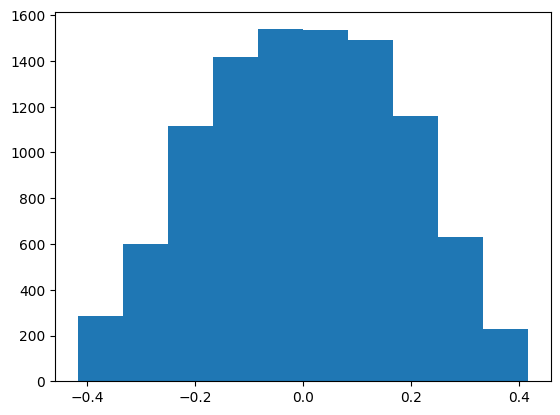

In [31]:
plt.hist(J.reshape(10000))

(array([ 7., 10., 12., 13., 13., 12., 12.,  7.,  9.,  5.]),
 array([-3.38885002, -2.67701651, -1.965183  , -1.25334948, -0.54151597,
         0.17031754,  0.88215106,  1.59398457,  2.30581809,  3.0176516 ,
         3.72948511]),
 <BarContainer object of 10 artists>)

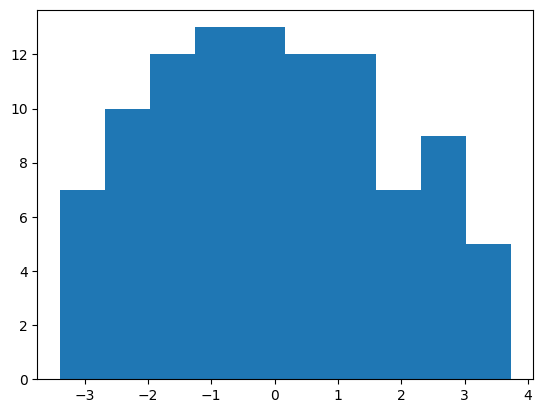

In [32]:
plt.hist(np.linalg.eigvals(J))

phi=-0.8975979010256552j
phi=-1.7951958020513104j
phi=-2.6927937030769655j
phi=-3.5903916041026207j
phi=-4.487989505128276j
phi=-5.385587406153931j
phi=0.8975979010256552j
phi=-0.8975979010256552j
phi=-1.7951958020513104j
phi=-2.6927937030769655j
phi=-3.5903916041026207j
phi=-4.487989505128276j


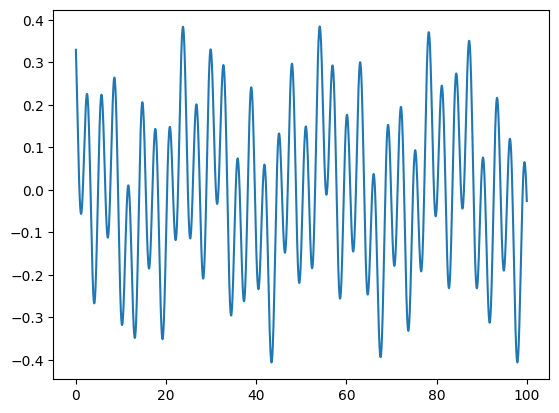

In [35]:
y_squared = np.linspace(0.0, 100.0, 2000)
R = np.array([[np.zeros(2000)],[np.sqrt(y_squared)]])

M = 2
N = 7
eta = 0

E_prime = G_eta(R, [1.0, 0.0], -1j*M*np.pi/N, 1.0, N, eta) + G_eta(R, [1.0, 0.0], 1j*M*np.pi/N, 1.0, N, eta)
plt.plot(y_squared, np.real(E_prime[0]))

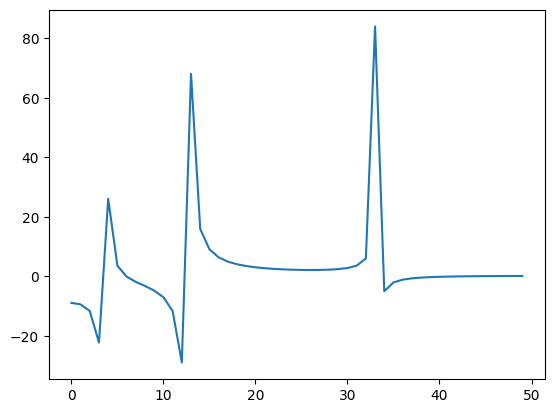

In [39]:
from scipy.fftpack import fftfreq


E_for = np.fft.rfft(E_prime[0])
plt.plot(E_for[0:50])